#**Penguin**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as ply


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/penguins.csv").dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
df.loc[df['sex'] == 'male' , 'sex'] =1
df.loc[df['sex'] == 'female' , 'sex'] =0

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


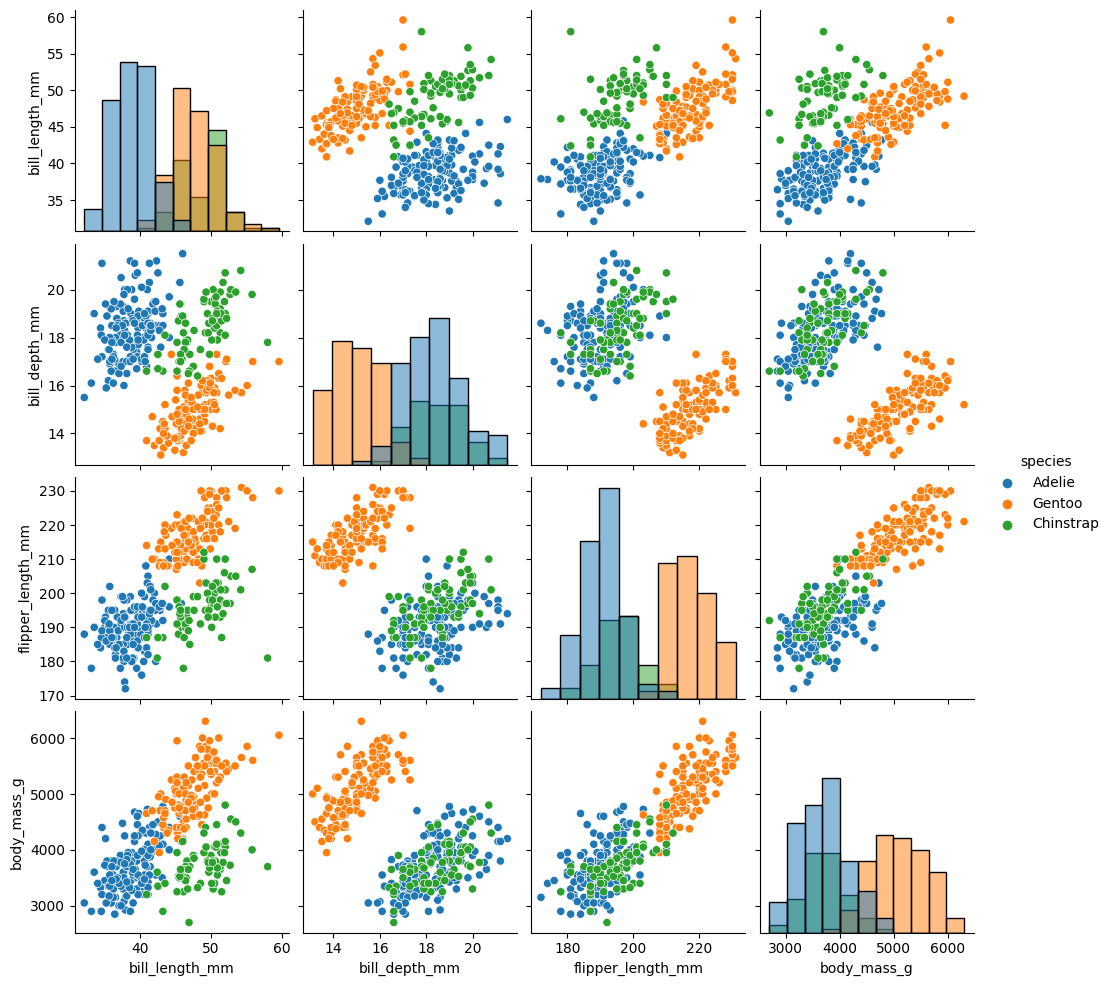

In [ ]:
sns.pairplot(df, vars=['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g'],hue='species' , kind = 'scatter' , diag_kind='hist')

In [ ]:
df.groupby("species")["island"].value_counts()

species    island   
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       119
Name: island, dtype: int64

In [ ]:
def code_island(row):
    if row == "Dream":
        return 0
    elif row == "Biscoe":
        return 1
    else:
        return 2


df["island_code"] = df["island"].apply(code_island)

df[["species","island","island_code"]]

,species,island,island_code
0,Adelie,Torgersen,2
1,Adelie,Torgersen,2
2,Adelie,Torgersen,2
4,Adelie,Torgersen,2
5,Adelie,Torgersen,2
...,...,...,...
339,Chinstrap,Dream,0
340,Chinstrap,Dream,0
341,Chinstrap,Dream,0
342,Chinstrap,Dream,0


In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == "object":
        le.fit_transform(list(df[i].values))
        df[i] = le.transform(df[i].values)

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_code
0,0,2,39.1,18.7,181.0,3750.0,1,2007,2
1,0,2,39.5,17.4,186.0,3800.0,0,2007,2
2,0,2,40.3,18.0,195.0,3250.0,0,2007,2
4,0,2,36.7,19.3,193.0,3450.0,0,2007,2
5,0,2,39.3,20.6,190.0,3650.0,1,2007,2
...,...,...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1,2009,0
340,1,1,43.5,18.1,202.0,3400.0,0,2009,0
341,1,1,49.6,18.2,193.0,3775.0,1,2009,0
342,1,1,50.8,19.0,210.0,4100.0,1,2009,0


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.213859           0.669754   
bill_depth_mm           -0.213859       1.000000          -0.517317   
flipper_length_mm        0.669754      -0.517317           1.000000   
body_mass_g              0.576480      -0.429283           0.840390   

                   body_mass_g  
bill_length_mm        0.576480  
bill_depth_mm        -0.429283  
flipper_length_mm     0.840390  
body_mass_g           1.000000  


<Axes: >

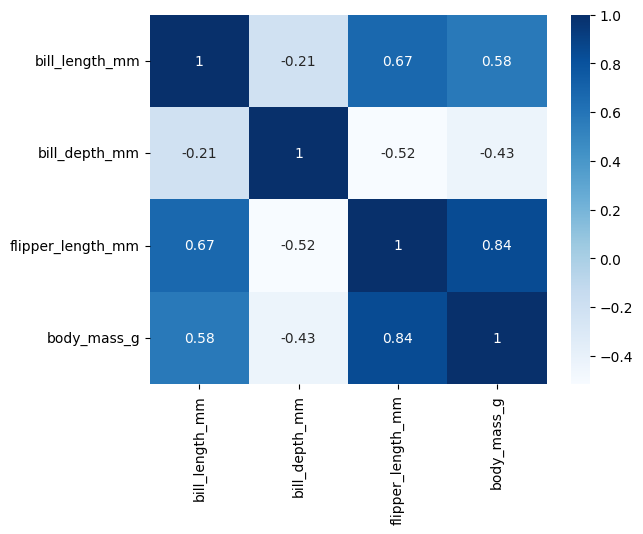

In [ ]:
corr=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr(method='spearman')
print(corr)
sns.heatmap(corr, annot=True , cmap="Blues")

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X=df[['bill_length_mm','bill_depth_mm','flipper_length_mm'	]]
Y= df['species']

In [ ]:
print("-------------------------Model 1 SVM-----------------------")
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Split  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.45)
# Create an SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Score :", accuracy*100,"%")

expected = Y
predicted = svm.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 1 SVM-----------------------
Score : 82.66666666666667 %
              precision    recall  f1-score   support

           0       0.71      0.99      0.82       146
           1       0.00      0.00      0.00        68
           2       0.92      1.00      0.96       119

    accuracy                           0.79       333
   macro avg       0.54      0.66      0.59       333
weighted avg       0.64      0.79      0.70       333

[[144   0   2]
 [ 60   0   8]
 [  0   0 119]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("-------------------------Model 2 Random Forest-----------------------")

x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.20)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
forest = RandomForestClassifier(criterion='gini',n_estimators=1, max_depth=10)
forest.fit(X, Y)

print("Score : ",forest.score(X, Y)*100 , "%")

expected = Y
predicted = forest.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 2 Random Forest-----------------------
Score :  99.09909909909909 %
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       146
           1       0.97      0.99      0.98        68
           2       0.99      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333

[[144   2   0]
 [  0  67   1]
 [  0   0 119]]


In [ ]:
print("-------------------------Model 3 Logistic R-----------------------")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
lr.fit(X_train, Y_train)

print("Accuracy: ", lr.score(X_test, Y_test) * 100)

expected = Y
predicted = lr.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 3 Logistic R-----------------------
Accuracy:  100.0
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       146
           1       0.98      0.96      0.97        68
           2       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.98      0.99       333
weighted avg       0.99      0.99      0.99       333

[[145   1   0]
 [  3  65   0]
 [  0   0 119]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
